In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import sarima_wrapper
#from utils import utils.find_first_occurrence_index, calculate_mse

In [2]:
os.listdir()

['Mackey-Glass.py',
 '.DS_Store',
 'playground.py',
 'requirements.txt',
 'electricitypricesdataset270624.xlsx',
 '__pycache__',
 'README.md',
 'sarima_wrapper.py',
 '.gitignore',
 'utils.py',
 '.git',
 'mackey_glass_time_series.csv',
 'system_price.ipynb',
 'chronos_wrapper.py']

###  System Price of electricity, pence per kilowatt-hour
This worksheet contains one table. 
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

In [3]:
system_prices = pd.read_excel("electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices['Date'] = pd.to_datetime(system_prices['Date'])
system_prices.set_index('Date')
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


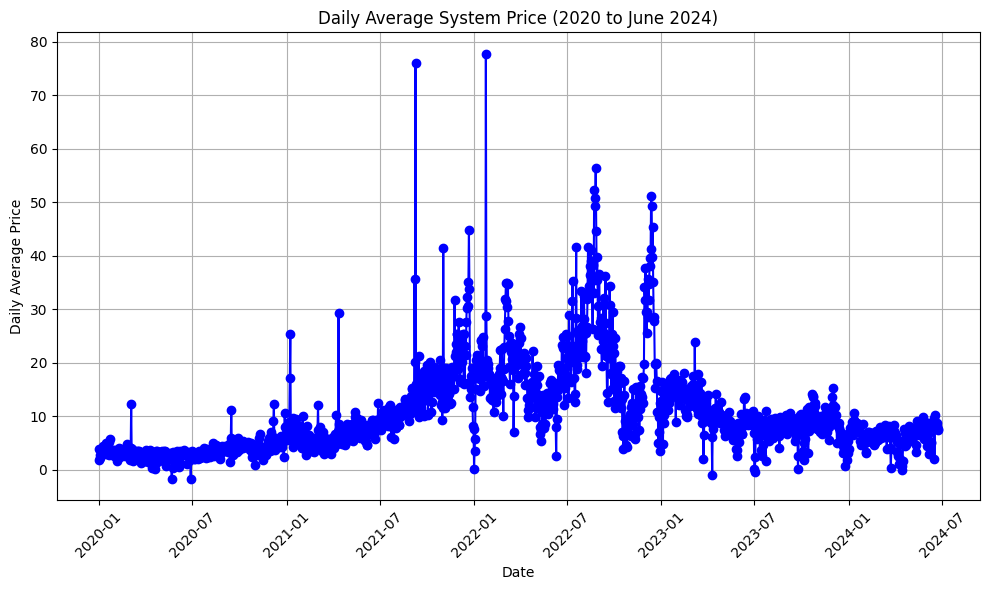

In [4]:
# Graph the daily average system price from 2020 to June 2024



# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices['Date'], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Average System Price (2020 to June 2024)')
plt.xlabel('Date')
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [5]:

def plot_data_for_date_range(data, start_date, end_date,plot=True):
    # Assuming 'system_prices' is your DataFrame
    system_prices['Date'] = pd.to_datetime(system_prices['Date'])

    # Filter the data within the date range
    mask = (system_prices['Date'] >= start_date) & (system_prices['Date'] <= end_date)
    filtered_data = system_prices.loc[mask]

    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    std_dev = filtered_data['Daily average'].std()

    # Identify data points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    if plot:
        # Plot the daily average system price for the filtered date range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data['Date'], filtered_data['Daily average'], linestyle='-', color='b')

        # Highlight regions outside 1 standard deviation
        plt.fill_between(filtered_data['Date'], mean_price - std_dev, mean_price + std_dev, color='yellow', alpha=0.3)

        # Highlight regions outside 2 standard deviations
        plt.fill_between(filtered_data['Date'], mean_price - 2 * std_dev, mean_price + 2 * std_dev, color='red', alpha=0.3)

        # Customize the plot
        plt.title(f'Daily Average System Price from {start_date} to {end_date}')
        plt.xlabel('Date')
        plt.ylabel('Daily Average Price')
        plt.grid(True)
        plt.xticks(rotation=45)

        # Show plot
        plt.tight_layout()
        plt.show()


    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    median_price = filtered_data['Daily average'].median()
    variance_price = filtered_data['Daily average'].var()
    std_dev = filtered_data['Daily average'].std()
    min_price = filtered_data['Daily average'].min()
    max_price = filtered_data['Daily average'].max()

    # Calculate the number of points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    
    num_one_std_dev_outliers = one_std_dev_outliers.shape[0]
    num_two_std_dev_outliers = two_std_dev_outliers.shape[0]

    total_points = filtered_data.shape[0]
    pct_one_std_dev_outliers = (num_one_std_dev_outliers / total_points) * 100
    pct_two_std_dev_outliers = (num_two_std_dev_outliers / total_points) * 100

    # Print the descriptive statistics
    print(f'Descriptive Statistics from {start_date} to {end_date}:')
    print(f'Mean: {mean_price}')
    print(f'Median: {median_price}')
    print(f'Variance: {variance_price}')
    print(f'Minimum: {min_price}')
    print(f'Maximum: {max_price}')
    print(f'Number of points outside 1 standard deviation: {num_one_std_dev_outliers} ({pct_one_std_dev_outliers:.2f}%)')
    print(f'Number of points outside 2 standard deviations: {num_two_std_dev_outliers} ({pct_two_std_dev_outliers:.2f}%)')

    # Prepare dictionary with descriptive statistics and outlier information
    statistics_dict = {
        'start_date': start_date,
        'end_date': end_date,
        'mean_price': mean_price,
        'median_price': median_price,
        'variance_price': variance_price,
        'std_deviation': std_dev,
        'min_price': min_price,
        'max_price': max_price,
        'num_outliers_1_std_dev': num_one_std_dev_outliers,
        'pct_outliers_1_std_dev': pct_one_std_dev_outliers,
        'num_outliers_2_std_dev': num_two_std_dev_outliers,
        'pct_outliers_2_std_dev': pct_two_std_dev_outliers
    }

    return statistics_dict    


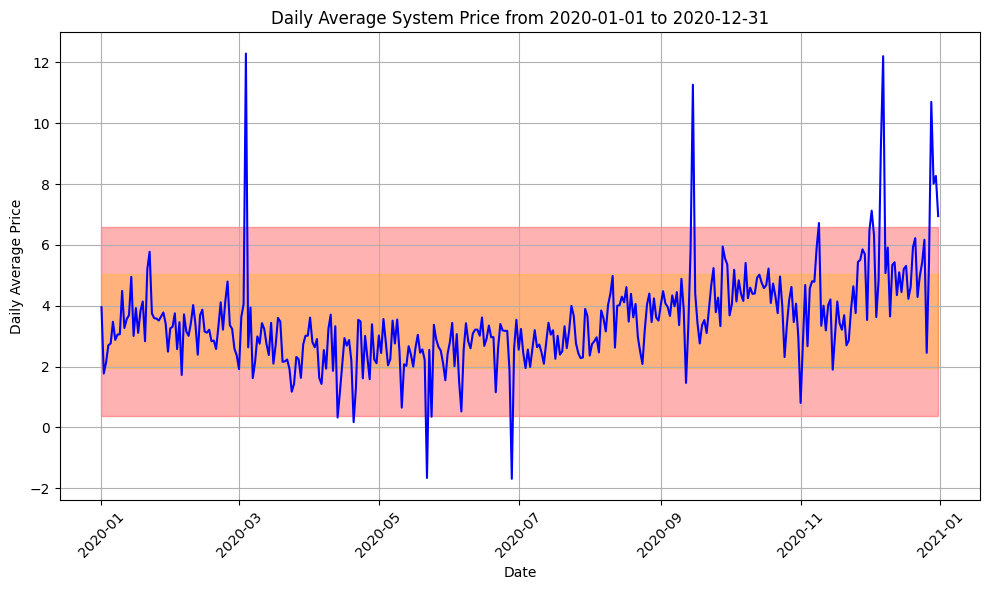

Descriptive Statistics from 2020-01-01 to 2020-12-31:
Mean: 3.494478142076503
Median: 3.3355
Variance: 2.408568085822292
Minimum: -1.691
Maximum: 12.289
Number of points outside 1 standard deviation: 69 (18.85%)
Number of points outside 2 standard deviations: 15 (4.10%)


{'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'mean_price': 3.494478142076503,
 'median_price': 3.3355,
 'variance_price': 2.408568085822292,
 'std_deviation': 1.551956212598246,
 'min_price': -1.691,
 'max_price': 12.289,
 'num_outliers_1_std_dev': 69,
 'pct_outliers_1_std_dev': 18.852459016393443,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.098360655737705}

In [6]:
plot_data_for_date_range(system_prices,'2020-01-01', '2020-12-31')

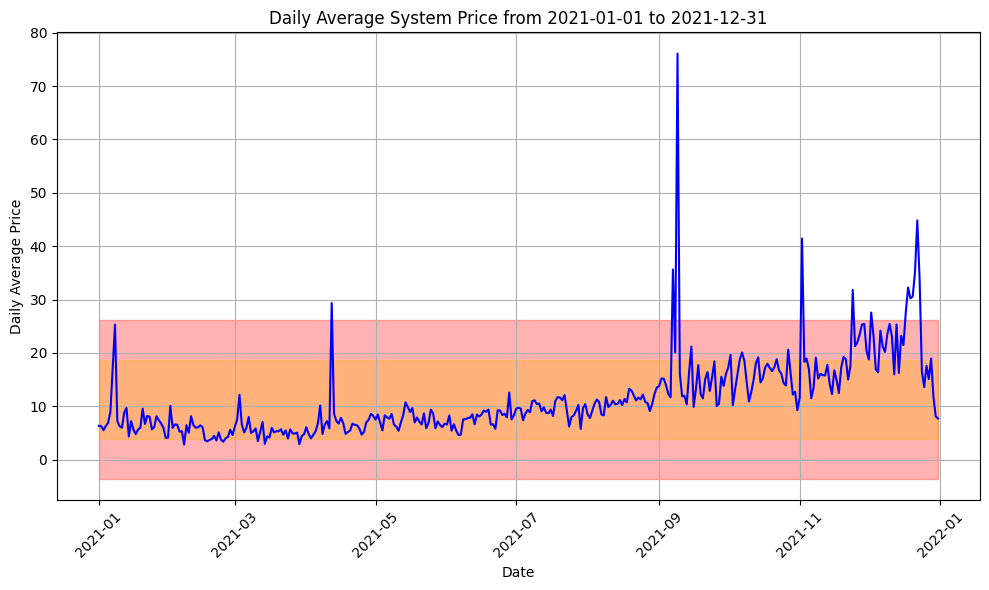

Descriptive Statistics from 2021-01-01 to 2021-12-31:
Mean: 11.248369863013698
Median: 9.144
Variance: 54.937008464473884
Minimum: 2.827
Maximum: 76.078
Number of points outside 1 standard deviation: 54 (14.79%)
Number of points outside 2 standard deviations: 13 (3.56%)


{'start_date': '2021-01-01',
 'end_date': '2021-12-31',
 'mean_price': 11.248369863013698,
 'median_price': 9.144,
 'variance_price': 54.937008464473884,
 'std_deviation': 7.411950381948997,
 'min_price': 2.827,
 'max_price': 76.078,
 'num_outliers_1_std_dev': 54,
 'pct_outliers_1_std_dev': 14.794520547945206,
 'num_outliers_2_std_dev': 13,
 'pct_outliers_2_std_dev': 3.5616438356164384}

In [7]:
plot_data_for_date_range(system_prices,'2021-01-01', '2021-12-31')

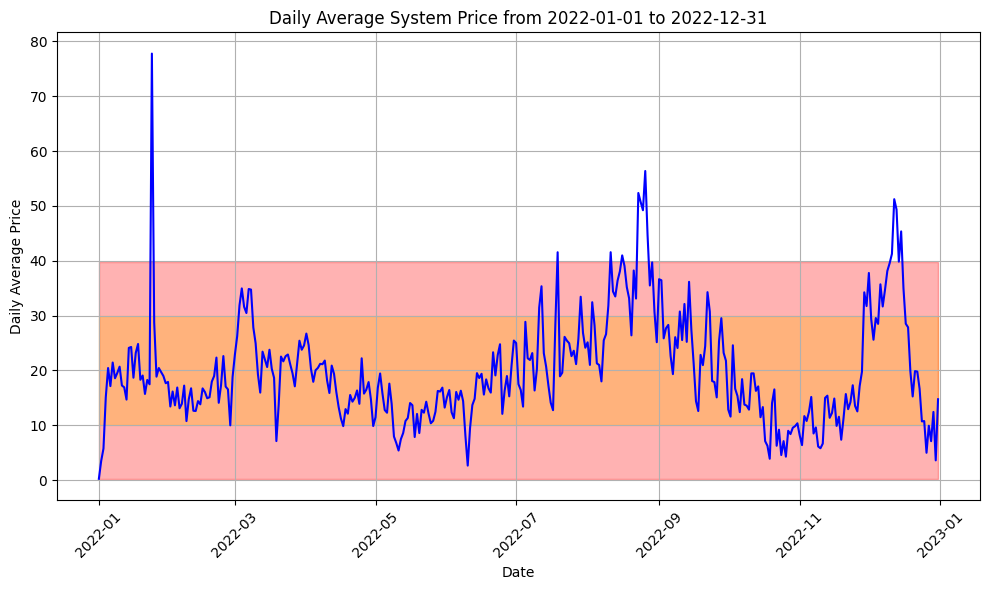

Descriptive Statistics from 2022-01-01 to 2022-12-31:
Mean: 20.008887671232877
Median: 18.006
Variance: 97.56512746811683
Minimum: 0.236
Maximum: 77.79
Number of points outside 1 standard deviation: 95 (26.03%)
Number of points outside 2 standard deviations: 15 (4.11%)


{'start_date': '2022-01-01',
 'end_date': '2022-12-31',
 'mean_price': 20.008887671232877,
 'median_price': 18.006,
 'variance_price': 97.56512746811683,
 'std_deviation': 9.877506136070826,
 'min_price': 0.236,
 'max_price': 77.79,
 'num_outliers_1_std_dev': 95,
 'pct_outliers_1_std_dev': 26.027397260273972,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.10958904109589}

In [8]:
plot_data_for_date_range(system_prices,'2022-01-01', '2022-12-31')

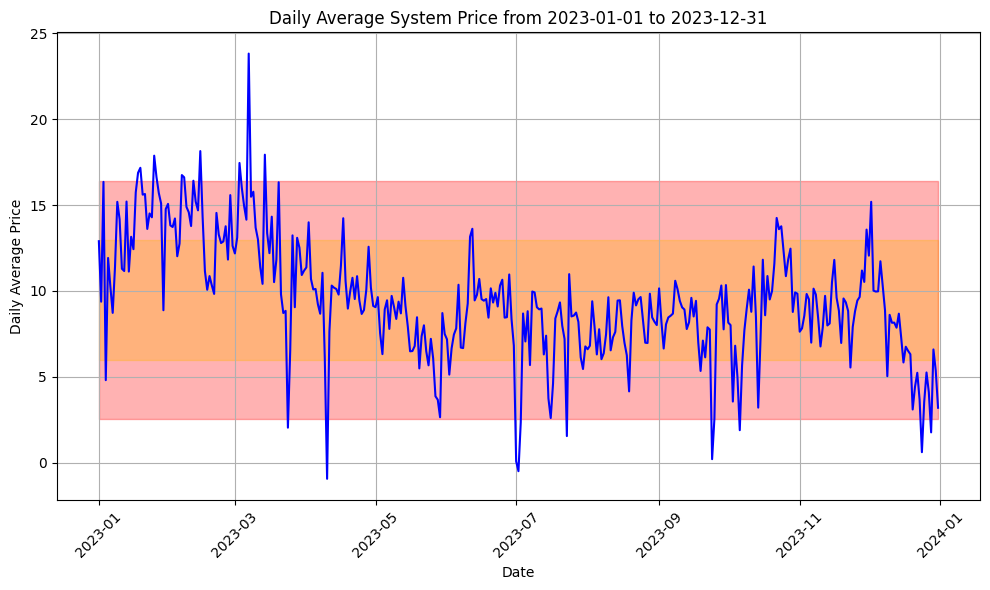

Descriptive Statistics from 2023-01-01 to 2023-12-31:
Mean: 9.469106849315068
Median: 9.269
Variance: 12.055958716573835
Minimum: -0.934
Maximum: 23.818
Number of points outside 1 standard deviation: 102 (27.95%)
Number of points outside 2 standard deviations: 21 (5.75%)


{'start_date': '2023-01-01',
 'end_date': '2023-12-31',
 'mean_price': 9.469106849315068,
 'median_price': 9.269,
 'variance_price': 12.055958716573835,
 'std_deviation': 3.472169165892387,
 'min_price': -0.934,
 'max_price': 23.818,
 'num_outliers_1_std_dev': 102,
 'pct_outliers_1_std_dev': 27.945205479452056,
 'num_outliers_2_std_dev': 21,
 'pct_outliers_2_std_dev': 5.7534246575342465}

In [9]:
plot_data_for_date_range(system_prices,'2023-01-01', '2023-12-31')

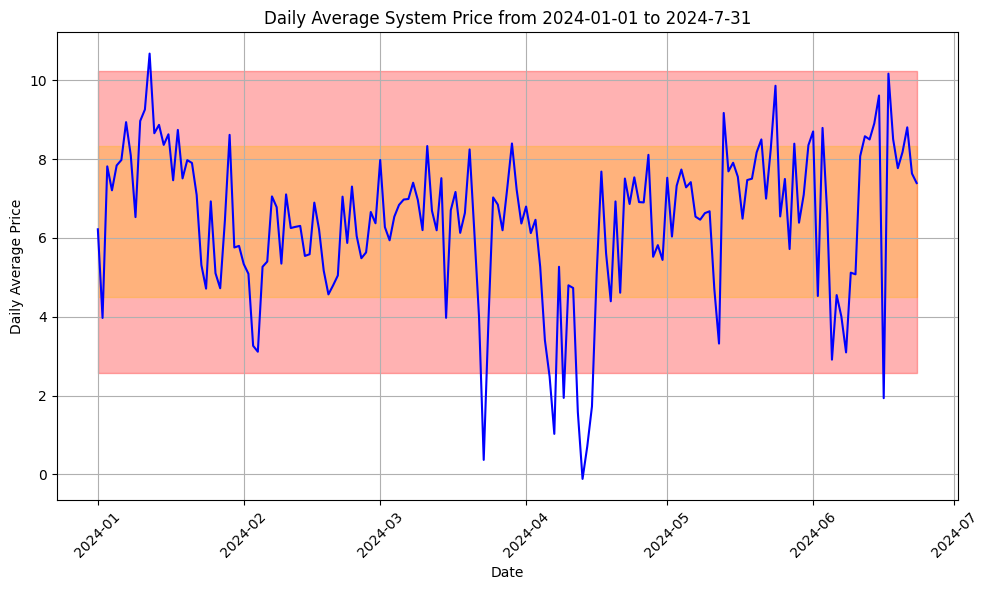

Descriptive Statistics from 2024-01-01 to 2024-7-31:
Mean: 6.412742857142857
Median: 6.677
Variance: 3.6673070197044324
Minimum: -0.112
Maximum: 10.677
Number of points outside 1 standard deviation: 47 (26.86%)
Number of points outside 2 standard deviations: 10 (5.71%)


{'start_date': '2024-01-01',
 'end_date': '2024-7-31',
 'mean_price': 6.412742857142857,
 'median_price': 6.677,
 'variance_price': 3.6673070197044324,
 'std_deviation': 1.9150214149466926,
 'min_price': -0.112,
 'max_price': 10.677,
 'num_outliers_1_std_dev': 47,
 'pct_outliers_1_std_dev': 26.857142857142858,
 'num_outliers_2_std_dev': 10,
 'pct_outliers_2_std_dev': 5.714285714285714}

In [10]:
plot_data_for_date_range(system_prices,'2024-01-01', '2024-7-31')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=767.382, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=745.262, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=725.050, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=765.406, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=723.555, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=724.999, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=721.428, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=723.130, Time=0.12 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=723.150, Time=0.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=744.085, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=722.690, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=72

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


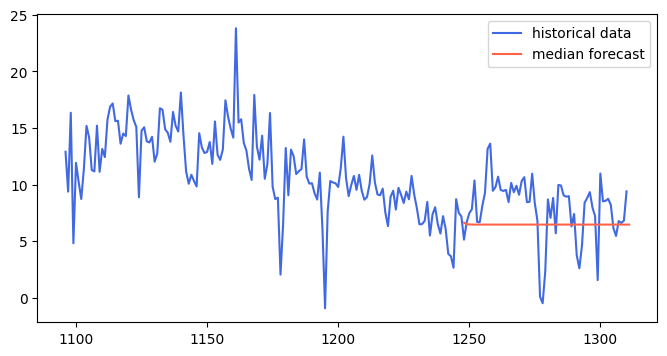

In [11]:
start = '2023-01-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

sarima_predictions = sarima_wrapper.sarima_predict(system_prices, 'Daily average', start,end, prediction_length)

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


 -------- PREDICT RUN ---------
Parameters are:

    input_data: 1636

    context_range: ['2023-01-01', '2023-06-01']

    prediction_length: 64

    autoregressions: 0

    median_predictions: 0

    low_predictions: 0

    high_predictions: 0

    initial_context_start: None

    initial_context_end: None


    
----------

Data
           Date  Daily average  7-day average
0    2020-01-01          3.951          3.721
1    2020-01-02          1.771          3.486
2    2020-01-03          2.135          3.113
3    2020-01-04          2.700          2.989
4    2020-01-05          2.758          2.853
...         ...            ...            ...
1631 2024-06-19          7.771          7.915
1632 2024-06-20          8.180          7.869
1633 2024-06-21          8.806          7.854
1634 2024-06-22          7.635          7.572
1635 2024-06-23          7.393          8.351

[1636 rows x 3 columns]
0        3.951
1        1.771
2        2.135
3        2.700
4        2.758
         ...  

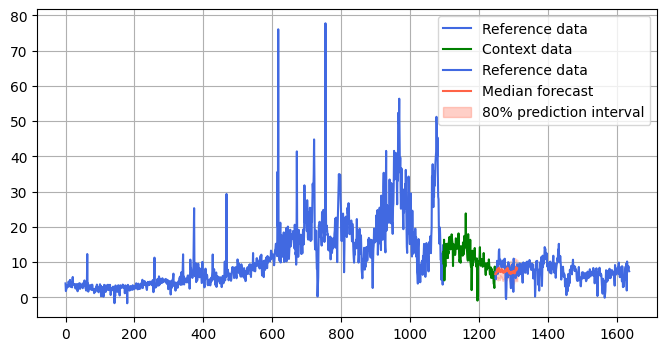

0     6.599954
1     6.934129
2     6.767042
3     6.975901
4     7.351848
        ...   
59    8.061970
60    8.563231
61    7.853110
62    7.811338
63    8.229057
Length: 64, dtype: float64

In [12]:
from chronos_wrapper import chronos_predict

chronos_predictions = chronos_predict(
            system_prices,
            'Daily average',
            [start,end],
            prediction_length)

chronos_predictions

In [21]:
# Forecast

forecast_start_index = utils.find_first_occurrence_index(system_prices, end, "Date") + 1
forecast_end_index = forecast_start_index + prediction_length

comparison_values = system_prices[forecast_start_index:forecast_end_index][column]

if not len(comparison_values) == len(sarima_predictions) == len(chronos_predictions):
  print("Unequal lengths of comparison values and predictions")


In [22]:
utils.calculate_mse(comparison_values, sarima_predictions)

calculate_mse


9.099176432717707

In [23]:
utils.calculate_mse(comparison_values, chronos_predictions)

calculate_mse


6.882538727182889